## import Libraries

In [1]:
import pandas as pd
import numpy as np
import keras 

Using TensorFlow backend.


In [5]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
concrete_data.shape

(1030, 9)

In [30]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [31]:
n_cols = predictors.shape[1] # number of predictors

#### A. Build a baseline model (5 marks)

- Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error as the loss function.

- 1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.

- 2. Train the model on the training data using 50 epochs.

- 3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

- 4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

- 5. Report the mean and the standard deviation of the mean squared errors.

In [32]:
from keras.models import Sequential
from keras.layers import Dense

In [33]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, train_size=0.70,test_size=0.30, random_state=100)

In [36]:
# build the model
model = regression_model()

In [37]:
# fit the model
model.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=2)

Train on 504 samples, validate on 217 samples
Epoch 1/50
 - 0s - loss: 2726.2573 - val_loss: 2362.1180
Epoch 2/50
 - 0s - loss: 1614.5961 - val_loss: 2170.1169
Epoch 3/50
 - 0s - loss: 1546.7070 - val_loss: 2022.3331
Epoch 4/50
 - 0s - loss: 1434.8538 - val_loss: 1913.4973
Epoch 5/50
 - 0s - loss: 1358.9179 - val_loss: 1811.0358
Epoch 6/50
 - 0s - loss: 1288.3878 - val_loss: 1710.1342
Epoch 7/50
 - 0s - loss: 1218.4426 - val_loss: 1610.3365
Epoch 8/50
 - 0s - loss: 1156.3783 - val_loss: 1494.7083
Epoch 9/50
 - 0s - loss: 1109.7194 - val_loss: 1427.3672
Epoch 10/50
 - 0s - loss: 1022.4036 - val_loss: 1322.9748
Epoch 11/50
 - 0s - loss: 966.5864 - val_loss: 1220.9122
Epoch 12/50
 - 0s - loss: 907.9658 - val_loss: 1136.4797
Epoch 13/50
 - 0s - loss: 854.1019 - val_loss: 1069.3095
Epoch 14/50
 - 0s - loss: 805.6341 - val_loss: 1005.5082
Epoch 15/50
 - 0s - loss: 760.7274 - val_loss: 947.7404
Epoch 16/50
 - 0s - loss: 721.1650 - val_loss: 888.7342
Epoch 17/50
 - 0s - loss: 679.1313 - val_lo

In [38]:
y_predicted = model.predict(X_test)

In [39]:
# model evaluation for testing set
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 10.05484590999517
MSE is 167.62830678395827
R2 score is 0.45007236855991084


In [44]:
result_mse=[]
for i in range(50):
    
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, train_size=0.70,test_size=0.30, random_state=100)
    model.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=2)
    y_predicted = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_predicted)
    mse = metrics.mean_squared_error(y_test, y_predicted)
    r2 = metrics.r2_score(y_test, y_predicted)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('MAE is {}'.format(mae))
    print('MSE is {}'.format(mse))
    print('R2 score is {}'.format(r2))
    result_mse.append(mse)
    
result_mse    

Train on 504 samples, validate on 217 samples
Epoch 1/50
 - 0s - loss: 65.9622 - val_loss: 89.0007
Epoch 2/50
 - 0s - loss: 65.1702 - val_loss: 88.3733
Epoch 3/50
 - 0s - loss: 65.2383 - val_loss: 91.1833
Epoch 4/50
 - 0s - loss: 64.9540 - val_loss: 88.7668
Epoch 5/50
 - 0s - loss: 65.2626 - val_loss: 88.4695
Epoch 6/50
 - 0s - loss: 65.1106 - val_loss: 88.2632
Epoch 7/50
 - 0s - loss: 65.3683 - val_loss: 90.2511
Epoch 8/50
 - 0s - loss: 66.4529 - val_loss: 89.4476
Epoch 9/50
 - 0s - loss: 64.9456 - val_loss: 87.6578
Epoch 10/50
 - 0s - loss: 65.3950 - val_loss: 87.7698
Epoch 11/50
 - 0s - loss: 65.8018 - val_loss: 88.0289
Epoch 12/50
 - 0s - loss: 65.2001 - val_loss: 88.1287
Epoch 13/50
 - 0s - loss: 67.5350 - val_loss: 93.0385
Epoch 14/50
 - 0s - loss: 69.3203 - val_loss: 88.3868
Epoch 15/50
 - 0s - loss: 64.6512 - val_loss: 88.4163
Epoch 16/50
 - 0s - loss: 64.8657 - val_loss: 87.9148
Epoch 17/50
 - 0s - loss: 64.9474 - val_loss: 89.4875
Epoch 18/50
 - 0s - loss: 68.9528 - val_loss:

Epoch 45/50
 - 0s - loss: 66.1079 - val_loss: 89.7310
Epoch 46/50
 - 0s - loss: 66.5437 - val_loss: 86.9108
Epoch 47/50
 - 0s - loss: 63.9862 - val_loss: 83.7203
Epoch 48/50
 - 0s - loss: 64.5158 - val_loss: 83.3297
Epoch 49/50
 - 0s - loss: 64.6693 - val_loss: 84.1219
Epoch 50/50
 - 0s - loss: 65.3829 - val_loss: 83.3041
The model performance for testing set
--------------------------------------
MAE is 6.45457428228508
MSE is 72.72588843288015
R2 score is 0.7614127569646411
Train on 504 samples, validate on 217 samples
Epoch 1/50
 - 0s - loss: 64.3373 - val_loss: 82.9094
Epoch 2/50
 - 0s - loss: 64.0976 - val_loss: 83.8519
Epoch 3/50
 - 0s - loss: 63.2877 - val_loss: 84.3308
Epoch 4/50
 - 0s - loss: 65.1576 - val_loss: 82.4347
Epoch 5/50
 - 0s - loss: 65.2972 - val_loss: 88.6311
Epoch 6/50
 - 0s - loss: 66.2857 - val_loss: 83.3240
Epoch 7/50
 - 0s - loss: 64.6561 - val_loss: 84.4975
Epoch 8/50
 - 0s - loss: 64.3415 - val_loss: 83.7759
Epoch 9/50
 - 0s - loss: 66.3648 - val_loss: 83.8

Epoch 36/50
 - 0s - loss: 64.6930 - val_loss: 82.1278
Epoch 37/50
 - 0s - loss: 64.0773 - val_loss: 80.1591
Epoch 38/50
 - 0s - loss: 64.5357 - val_loss: 83.7450
Epoch 39/50
 - 0s - loss: 64.2165 - val_loss: 83.3092
Epoch 40/50
 - 0s - loss: 63.9906 - val_loss: 80.5328
Epoch 41/50
 - 0s - loss: 63.5078 - val_loss: 80.0890
Epoch 42/50
 - 0s - loss: 63.2978 - val_loss: 80.5694
Epoch 43/50
 - 0s - loss: 62.4657 - val_loss: 79.1501
Epoch 44/50
 - 0s - loss: 62.7046 - val_loss: 79.1169
Epoch 45/50
 - 0s - loss: 61.7959 - val_loss: 79.9095
Epoch 46/50
 - 0s - loss: 62.7624 - val_loss: 79.9376
Epoch 47/50
 - 0s - loss: 61.6668 - val_loss: 81.5029
Epoch 48/50
 - 0s - loss: 63.5884 - val_loss: 80.1909
Epoch 49/50
 - 0s - loss: 62.2902 - val_loss: 79.2161
Epoch 50/50
 - 0s - loss: 61.9316 - val_loss: 78.7160
The model performance for testing set
--------------------------------------
MAE is 6.339098827460823
MSE is 70.75110033329409
R2 score is 0.7678913199414841
Train on 504 samples, validate o

Epoch 27/50
 - 0s - loss: 58.1675 - val_loss: 74.8450
Epoch 28/50
 - 0s - loss: 58.8085 - val_loss: 75.3815
Epoch 29/50
 - 0s - loss: 58.8455 - val_loss: 77.2420
Epoch 30/50
 - 0s - loss: 60.0628 - val_loss: 74.6423
Epoch 31/50
 - 0s - loss: 58.2354 - val_loss: 76.2584
Epoch 32/50
 - 0s - loss: 58.6952 - val_loss: 75.3393
Epoch 33/50
 - 0s - loss: 58.0445 - val_loss: 75.4196
Epoch 34/50
 - 0s - loss: 59.9636 - val_loss: 74.9242
Epoch 35/50
 - 0s - loss: 58.6197 - val_loss: 74.5827
Epoch 36/50
 - 0s - loss: 58.4798 - val_loss: 76.3122
Epoch 37/50
 - 0s - loss: 58.8514 - val_loss: 76.2467
Epoch 38/50
 - 0s - loss: 59.3316 - val_loss: 77.5023
Epoch 39/50
 - 0s - loss: 59.5408 - val_loss: 75.4145
Epoch 40/50
 - 0s - loss: 58.2573 - val_loss: 75.4406
Epoch 41/50
 - 0s - loss: 62.0141 - val_loss: 79.7663
Epoch 42/50
 - 0s - loss: 59.2570 - val_loss: 75.4656
Epoch 43/50
 - 0s - loss: 59.2762 - val_loss: 81.0206
Epoch 44/50
 - 0s - loss: 60.1836 - val_loss: 81.1955
Epoch 45/50
 - 0s - loss: 59

Epoch 18/50
 - 0s - loss: 54.8080 - val_loss: 73.7947
Epoch 19/50
 - 0s - loss: 54.8347 - val_loss: 73.6237
Epoch 20/50
 - 0s - loss: 54.6944 - val_loss: 77.8553
Epoch 21/50
 - 0s - loss: 55.6785 - val_loss: 73.4935
Epoch 22/50
 - 0s - loss: 54.3169 - val_loss: 75.2983
Epoch 23/50
 - 0s - loss: 56.5042 - val_loss: 74.3920
Epoch 24/50
 - 0s - loss: 54.8346 - val_loss: 74.2826
Epoch 25/50
 - 0s - loss: 56.0015 - val_loss: 73.2091
Epoch 26/50
 - 0s - loss: 54.2059 - val_loss: 73.0623
Epoch 27/50
 - 0s - loss: 54.8456 - val_loss: 73.6726
Epoch 28/50
 - 0s - loss: 57.4012 - val_loss: 72.7827
Epoch 29/50
 - 0s - loss: 54.2597 - val_loss: 76.3885
Epoch 30/50
 - 0s - loss: 54.5164 - val_loss: 73.0643
Epoch 31/50
 - 0s - loss: 53.9401 - val_loss: 72.7210
Epoch 32/50
 - 0s - loss: 54.1129 - val_loss: 72.3871
Epoch 33/50
 - 0s - loss: 54.0846 - val_loss: 72.2333
Epoch 34/50
 - 0s - loss: 54.6904 - val_loss: 75.4275
Epoch 35/50
 - 0s - loss: 54.0843 - val_loss: 72.6086
Epoch 36/50
 - 0s - loss: 53

Epoch 9/50
 - 0s - loss: 51.3114 - val_loss: 67.6149
Epoch 10/50
 - 0s - loss: 51.9148 - val_loss: 68.8814
Epoch 11/50
 - 0s - loss: 52.0940 - val_loss: 68.7959
Epoch 12/50
 - 0s - loss: 52.1008 - val_loss: 69.0917
Epoch 13/50
 - 0s - loss: 52.0866 - val_loss: 67.3686
Epoch 14/50
 - 0s - loss: 51.6889 - val_loss: 68.8895
Epoch 15/50
 - 0s - loss: 51.8921 - val_loss: 67.1027
Epoch 16/50
 - 0s - loss: 51.8945 - val_loss: 67.0474
Epoch 17/50
 - 0s - loss: 53.6982 - val_loss: 66.9098
Epoch 18/50
 - 0s - loss: 51.5794 - val_loss: 68.9057
Epoch 19/50
 - 0s - loss: 51.9974 - val_loss: 67.8957
Epoch 20/50
 - 0s - loss: 52.0624 - val_loss: 68.6685
Epoch 21/50
 - 0s - loss: 50.3431 - val_loss: 70.1594
Epoch 22/50
 - 0s - loss: 52.2675 - val_loss: 66.6406
Epoch 23/50
 - 0s - loss: 51.9314 - val_loss: 66.6622
Epoch 24/50
 - 0s - loss: 51.9662 - val_loss: 68.1216
Epoch 25/50
 - 0s - loss: 51.8126 - val_loss: 66.5639
Epoch 26/50
 - 0s - loss: 51.5822 - val_loss: 67.0717
Epoch 27/50
 - 0s - loss: 51.

Train on 504 samples, validate on 217 samples
Epoch 1/50
 - 0s - loss: 49.2744 - val_loss: 59.2346
Epoch 2/50
 - 0s - loss: 48.5092 - val_loss: 59.2485
Epoch 3/50
 - 0s - loss: 49.1129 - val_loss: 58.6183
Epoch 4/50
 - 0s - loss: 48.4330 - val_loss: 58.5771
Epoch 5/50
 - 0s - loss: 49.2405 - val_loss: 58.6069
Epoch 6/50
 - 0s - loss: 49.1897 - val_loss: 58.4544
Epoch 7/50
 - 0s - loss: 48.9247 - val_loss: 58.4359
Epoch 8/50
 - 0s - loss: 48.7595 - val_loss: 58.5531
Epoch 9/50
 - 0s - loss: 49.0623 - val_loss: 60.1474
Epoch 10/50
 - 0s - loss: 49.0987 - val_loss: 62.0792
Epoch 11/50
 - 0s - loss: 50.0998 - val_loss: 60.3231
Epoch 12/50
 - 0s - loss: 48.1573 - val_loss: 58.0761
Epoch 13/50
 - 0s - loss: 48.7868 - val_loss: 58.9242
Epoch 14/50
 - 0s - loss: 51.3554 - val_loss: 58.0955
Epoch 15/50
 - 0s - loss: 48.5210 - val_loss: 57.9638
Epoch 16/50
 - 0s - loss: 48.1117 - val_loss: 58.1151
Epoch 17/50
 - 0s - loss: 49.1641 - val_loss: 57.9891
Epoch 18/50
 - 0s - loss: 48.0471 - val_loss:

Epoch 45/50
 - 0s - loss: 46.1353 - val_loss: 53.8141
Epoch 46/50
 - 0s - loss: 46.6108 - val_loss: 55.1200
Epoch 47/50
 - 0s - loss: 46.8593 - val_loss: 53.7885
Epoch 48/50
 - 0s - loss: 46.8332 - val_loss: 57.0686
Epoch 49/50
 - 0s - loss: 47.2508 - val_loss: 53.6095
Epoch 50/50
 - 0s - loss: 46.5497 - val_loss: 55.2507
The model performance for testing set
--------------------------------------
MAE is 5.9029643472190045
MSE is 56.75609759233423
R2 score is 0.8138038442459421
Train on 504 samples, validate on 217 samples
Epoch 1/50
 - 0s - loss: 46.4122 - val_loss: 54.0155
Epoch 2/50
 - 0s - loss: 46.1923 - val_loss: 54.7119
Epoch 3/50
 - 0s - loss: 46.5131 - val_loss: 53.7434
Epoch 4/50
 - 0s - loss: 46.0676 - val_loss: 53.3594
Epoch 5/50
 - 0s - loss: 46.2560 - val_loss: 54.3064
Epoch 6/50
 - 0s - loss: 46.5163 - val_loss: 53.9304
Epoch 7/50
 - 0s - loss: 46.6056 - val_loss: 54.8715
Epoch 8/50
 - 0s - loss: 48.0741 - val_loss: 53.5715
Epoch 9/50
 - 0s - loss: 47.0285 - val_loss: 53

Epoch 36/50
 - 0s - loss: 45.0539 - val_loss: 54.3042
Epoch 37/50
 - 0s - loss: 45.6519 - val_loss: 52.2051
Epoch 38/50
 - 0s - loss: 45.5303 - val_loss: 51.9855
Epoch 39/50
 - 0s - loss: 45.4016 - val_loss: 52.6517
Epoch 40/50
 - 0s - loss: 46.6072 - val_loss: 52.0627
Epoch 41/50
 - 0s - loss: 45.3373 - val_loss: 52.6462
Epoch 42/50
 - 0s - loss: 45.4116 - val_loss: 52.4180
Epoch 43/50
 - 0s - loss: 45.8524 - val_loss: 51.9754
Epoch 44/50
 - 0s - loss: 46.2046 - val_loss: 52.5236
Epoch 45/50
 - 0s - loss: 45.7186 - val_loss: 53.7418
Epoch 46/50
 - 0s - loss: 45.6516 - val_loss: 54.6416
Epoch 47/50
 - 0s - loss: 45.0997 - val_loss: 51.9104
Epoch 48/50
 - 0s - loss: 45.5465 - val_loss: 53.0149
Epoch 49/50
 - 0s - loss: 44.5872 - val_loss: 53.2511
Epoch 50/50
 - 0s - loss: 46.5055 - val_loss: 52.7157
The model performance for testing set
--------------------------------------
MAE is 5.992627724808397
MSE is 58.10058142280765
R2 score is 0.8093930807980081
Train on 504 samples, validate o

Epoch 27/50
 - 0s - loss: 45.4842 - val_loss: 54.2723
Epoch 28/50
 - 0s - loss: 44.6616 - val_loss: 51.5392
Epoch 29/50
 - 0s - loss: 44.1805 - val_loss: 52.9774
Epoch 30/50
 - 0s - loss: 44.4538 - val_loss: 51.5823
Epoch 31/50
 - 0s - loss: 44.3726 - val_loss: 52.4716
Epoch 32/50
 - 0s - loss: 44.2750 - val_loss: 51.3898
Epoch 33/50
 - 0s - loss: 44.2167 - val_loss: 51.3815
Epoch 34/50
 - 0s - loss: 44.1048 - val_loss: 51.5621
Epoch 35/50
 - 0s - loss: 44.6493 - val_loss: 51.7215
Epoch 36/50
 - 0s - loss: 45.0350 - val_loss: 51.7828
Epoch 37/50
 - 0s - loss: 45.0554 - val_loss: 51.3767
Epoch 38/50
 - 0s - loss: 44.6317 - val_loss: 52.4100
Epoch 39/50
 - 0s - loss: 46.4399 - val_loss: 51.4286
Epoch 40/50
 - 0s - loss: 45.0614 - val_loss: 51.8140
Epoch 41/50
 - 0s - loss: 46.2929 - val_loss: 58.6113
Epoch 42/50
 - 0s - loss: 43.8932 - val_loss: 51.2289
Epoch 43/50
 - 0s - loss: 44.6335 - val_loss: 51.3708
Epoch 44/50
 - 0s - loss: 44.7239 - val_loss: 52.7435
Epoch 45/50
 - 0s - loss: 44

Epoch 18/50
 - 0s - loss: 40.4582 - val_loss: 52.0341
Epoch 19/50
 - 0s - loss: 40.4732 - val_loss: 52.0294
Epoch 20/50
 - 0s - loss: 41.4105 - val_loss: 52.3581
Epoch 21/50
 - 0s - loss: 41.0689 - val_loss: 52.5819
Epoch 22/50
 - 0s - loss: 40.7374 - val_loss: 54.2125
Epoch 23/50
 - 0s - loss: 41.0106 - val_loss: 52.3075
Epoch 24/50
 - 0s - loss: 40.5208 - val_loss: 52.9595
Epoch 25/50
 - 0s - loss: 42.1356 - val_loss: 57.0644
Epoch 26/50
 - 0s - loss: 43.2045 - val_loss: 54.6005
Epoch 27/50
 - 0s - loss: 41.7046 - val_loss: 53.0568
Epoch 28/50
 - 0s - loss: 40.6591 - val_loss: 52.2077
Epoch 29/50
 - 0s - loss: 41.6439 - val_loss: 53.2998
Epoch 30/50
 - 0s - loss: 40.6401 - val_loss: 52.6939
Epoch 31/50
 - 0s - loss: 40.6526 - val_loss: 52.1907
Epoch 32/50
 - 0s - loss: 41.2350 - val_loss: 56.6938
Epoch 33/50
 - 0s - loss: 43.2072 - val_loss: 54.7663
Epoch 34/50
 - 0s - loss: 43.2252 - val_loss: 52.3088
Epoch 35/50
 - 0s - loss: 40.9674 - val_loss: 56.8236
Epoch 36/50
 - 0s - loss: 42

Epoch 9/50
 - 0s - loss: 40.4767 - val_loss: 52.3719
Epoch 10/50
 - 0s - loss: 41.6812 - val_loss: 55.2773
Epoch 11/50
 - 0s - loss: 40.1275 - val_loss: 52.6643
Epoch 12/50
 - 0s - loss: 40.7212 - val_loss: 54.3934
Epoch 13/50
 - 0s - loss: 40.7109 - val_loss: 53.0689
Epoch 14/50
 - 0s - loss: 40.6328 - val_loss: 53.4419
Epoch 15/50
 - 0s - loss: 40.2949 - val_loss: 52.9012
Epoch 16/50
 - 0s - loss: 40.0602 - val_loss: 52.2445
Epoch 17/50
 - 0s - loss: 40.4688 - val_loss: 52.1445
Epoch 18/50
 - 0s - loss: 41.1769 - val_loss: 52.4766
Epoch 19/50
 - 0s - loss: 41.2153 - val_loss: 52.7109
Epoch 20/50
 - 0s - loss: 40.3968 - val_loss: 52.1434
Epoch 21/50
 - 0s - loss: 39.8553 - val_loss: 52.6920
Epoch 22/50
 - 0s - loss: 39.7639 - val_loss: 53.8931
Epoch 23/50
 - 0s - loss: 40.6166 - val_loss: 53.4356
Epoch 24/50
 - 0s - loss: 40.0136 - val_loss: 52.7415
Epoch 25/50
 - 0s - loss: 40.4672 - val_loss: 52.3543
Epoch 26/50
 - 0s - loss: 39.4486 - val_loss: 54.0247
Epoch 27/50
 - 0s - loss: 41.

Epoch 2/50
 - 0s - loss: 40.5324 - val_loss: 54.0628
Epoch 3/50
 - 0s - loss: 40.0322 - val_loss: 52.0289
Epoch 4/50
 - 0s - loss: 39.5574 - val_loss: 53.1217
Epoch 5/50
 - 0s - loss: 40.4470 - val_loss: 52.5105
Epoch 6/50
 - 0s - loss: 39.4478 - val_loss: 52.2535
Epoch 7/50
 - 0s - loss: 40.2750 - val_loss: 53.1222
Epoch 8/50
 - 0s - loss: 40.6303 - val_loss: 53.2229
Epoch 9/50
 - 0s - loss: 40.3529 - val_loss: 53.3770
Epoch 10/50
 - 0s - loss: 39.8858 - val_loss: 52.6487
Epoch 11/50
 - 0s - loss: 39.7114 - val_loss: 53.2865
Epoch 12/50
 - 0s - loss: 40.6166 - val_loss: 52.9672
Epoch 13/50
 - 0s - loss: 39.7934 - val_loss: 53.0887
Epoch 14/50
 - 0s - loss: 39.6281 - val_loss: 52.6871
Epoch 15/50
 - 0s - loss: 39.7966 - val_loss: 53.3282
Epoch 16/50
 - 0s - loss: 40.0508 - val_loss: 52.0730
Epoch 17/50
 - 0s - loss: 41.1378 - val_loss: 54.3677
Epoch 18/50
 - 0s - loss: 40.5721 - val_loss: 52.0311
Epoch 19/50
 - 0s - loss: 39.8586 - val_loss: 54.2057
Epoch 20/50
 - 0s - loss: 40.4244 - 

Epoch 47/50
 - 0s - loss: 39.5308 - val_loss: 52.8224
Epoch 48/50
 - 0s - loss: 39.9227 - val_loss: 52.9865
Epoch 49/50
 - 0s - loss: 39.1358 - val_loss: 52.6215
Epoch 50/50
 - 0s - loss: 39.0222 - val_loss: 52.5302
The model performance for testing set
--------------------------------------
MAE is 5.99382321009744
MSE is 57.795834613247855
R2 score is 0.8103928444679122
Train on 504 samples, validate on 217 samples
Epoch 1/50
 - 0s - loss: 39.1897 - val_loss: 52.5478
Epoch 2/50
 - 0s - loss: 39.4704 - val_loss: 54.5852
Epoch 3/50
 - 0s - loss: 40.0470 - val_loss: 52.8774
Epoch 4/50
 - 0s - loss: 39.7755 - val_loss: 52.3036
Epoch 5/50
 - 0s - loss: 38.9919 - val_loss: 52.8059
Epoch 6/50
 - 0s - loss: 38.8147 - val_loss: 53.2700
Epoch 7/50
 - 0s - loss: 39.0666 - val_loss: 52.6375
Epoch 8/50
 - 0s - loss: 40.1948 - val_loss: 54.6620
Epoch 9/50
 - 0s - loss: 39.5459 - val_loss: 52.2585
Epoch 10/50
 - 0s - loss: 39.1936 - val_loss: 54.3382
Epoch 11/50
 - 0s - loss: 40.1375 - val_loss: 52.

Epoch 38/50
 - 0s - loss: 38.2500 - val_loss: 52.5698
Epoch 39/50
 - 0s - loss: 38.1218 - val_loss: 52.8461
Epoch 40/50
 - 0s - loss: 39.9404 - val_loss: 52.6187
Epoch 41/50
 - 0s - loss: 39.4014 - val_loss: 52.2844
Epoch 42/50
 - 0s - loss: 38.5536 - val_loss: 52.5648
Epoch 43/50
 - 0s - loss: 38.7167 - val_loss: 52.0506
Epoch 44/50
 - 0s - loss: 38.9903 - val_loss: 53.5476
Epoch 45/50
 - 0s - loss: 39.1600 - val_loss: 52.6134
Epoch 46/50
 - 0s - loss: 38.4057 - val_loss: 51.9625
Epoch 47/50
 - 0s - loss: 39.0734 - val_loss: 52.3497
Epoch 48/50
 - 0s - loss: 41.1331 - val_loss: 52.6841
Epoch 49/50
 - 0s - loss: 38.9562 - val_loss: 53.9951
Epoch 50/50
 - 0s - loss: 38.7762 - val_loss: 53.3472
The model performance for testing set
--------------------------------------
MAE is 5.989951556307599
MSE is 57.839311072992665
R2 score is 0.8102502139838992
Train on 504 samples, validate on 217 samples
Epoch 1/50
 - 0s - loss: 38.8083 - val_loss: 52.2619
Epoch 2/50
 - 0s - loss: 38.3393 - val_l

Epoch 29/50
 - 0s - loss: 38.1597 - val_loss: 51.9614
Epoch 30/50
 - 0s - loss: 38.5579 - val_loss: 52.0711
Epoch 31/50
 - 0s - loss: 38.1168 - val_loss: 52.2118
Epoch 32/50
 - 0s - loss: 38.3897 - val_loss: 52.9467
Epoch 33/50
 - 0s - loss: 39.2177 - val_loss: 52.6714
Epoch 34/50
 - 0s - loss: 38.8885 - val_loss: 51.8784
Epoch 35/50
 - 0s - loss: 38.7730 - val_loss: 52.5649
Epoch 36/50
 - 0s - loss: 38.9358 - val_loss: 52.9633
Epoch 37/50
 - 0s - loss: 39.2395 - val_loss: 55.0483
Epoch 38/50
 - 0s - loss: 38.3460 - val_loss: 51.9413
Epoch 39/50
 - 0s - loss: 38.4507 - val_loss: 51.8176
Epoch 40/50
 - 0s - loss: 39.3632 - val_loss: 52.4803
Epoch 41/50
 - 0s - loss: 38.6182 - val_loss: 52.2544
Epoch 42/50
 - 0s - loss: 39.1128 - val_loss: 52.1832
Epoch 43/50
 - 0s - loss: 38.9945 - val_loss: 54.6526
Epoch 44/50
 - 0s - loss: 38.6179 - val_loss: 52.2438
Epoch 45/50
 - 0s - loss: 38.3452 - val_loss: 51.9431
Epoch 46/50
 - 0s - loss: 38.3617 - val_loss: 51.8917
Epoch 47/50
 - 0s - loss: 39

Epoch 20/50
 - 0s - loss: 37.9078 - val_loss: 53.8481
Epoch 21/50
 - 0s - loss: 38.0944 - val_loss: 53.0107
Epoch 22/50
 - 0s - loss: 38.1225 - val_loss: 52.6954
Epoch 23/50
 - 0s - loss: 38.3931 - val_loss: 52.2327
Epoch 24/50
 - 0s - loss: 38.0122 - val_loss: 52.4631
Epoch 25/50
 - 0s - loss: 38.1803 - val_loss: 52.3231
Epoch 26/50
 - 0s - loss: 38.5386 - val_loss: 52.4154
Epoch 27/50
 - 0s - loss: 38.7097 - val_loss: 54.6975
Epoch 28/50
 - 0s - loss: 38.9598 - val_loss: 54.1336
Epoch 29/50
 - 0s - loss: 39.0394 - val_loss: 52.6376
Epoch 30/50
 - 0s - loss: 37.9294 - val_loss: 52.2098
Epoch 31/50
 - 0s - loss: 38.0525 - val_loss: 52.8512
Epoch 32/50
 - 0s - loss: 38.1135 - val_loss: 51.9685
Epoch 33/50
 - 0s - loss: 37.9716 - val_loss: 53.0366
Epoch 34/50
 - 0s - loss: 39.0318 - val_loss: 52.2114
Epoch 35/50
 - 0s - loss: 37.7829 - val_loss: 52.3511
Epoch 36/50
 - 0s - loss: 38.2004 - val_loss: 52.3828
Epoch 37/50
 - 0s - loss: 38.3978 - val_loss: 52.3931
Epoch 38/50
 - 0s - loss: 38

Epoch 11/50
 - 0s - loss: 38.8349 - val_loss: 53.1848
Epoch 12/50
 - 0s - loss: 38.4412 - val_loss: 52.5544
Epoch 13/50
 - 0s - loss: 38.6887 - val_loss: 52.5311
Epoch 14/50
 - 0s - loss: 37.9802 - val_loss: 52.5662
Epoch 15/50
 - 0s - loss: 38.4346 - val_loss: 52.9171
Epoch 16/50
 - 0s - loss: 38.0973 - val_loss: 52.6634
Epoch 17/50
 - 0s - loss: 38.3526 - val_loss: 52.3363
Epoch 18/50
 - 0s - loss: 38.1784 - val_loss: 53.6682
Epoch 19/50
 - 0s - loss: 38.4404 - val_loss: 52.4185
Epoch 20/50
 - 0s - loss: 38.9039 - val_loss: 52.2320
Epoch 21/50
 - 0s - loss: 38.1105 - val_loss: 52.4610
Epoch 22/50
 - 0s - loss: 38.1497 - val_loss: 52.5367
Epoch 23/50
 - 0s - loss: 40.2099 - val_loss: 53.1313
Epoch 24/50
 - 0s - loss: 38.4856 - val_loss: 52.5207
Epoch 25/50
 - 0s - loss: 38.8392 - val_loss: 52.2509
Epoch 26/50
 - 0s - loss: 38.1818 - val_loss: 52.1805
Epoch 27/50
 - 0s - loss: 38.4222 - val_loss: 52.5886
Epoch 28/50
 - 0s - loss: 38.6103 - val_loss: 52.2754
Epoch 29/50
 - 0s - loss: 37

[76.94991440710896,
 77.57382675233534,
 72.72588843288015,
 72.06158475722074,
 72.30599044489807,
 70.75110033329409,
 70.9641929980387,
 69.41070506278841,
 68.66635584647443,
 69.05164743044058,
 68.1728508750963,
 66.64323516755734,
 63.97370205286188,
 61.259259570539534,
 60.98417027830795,
 60.65156968579406,
 59.42593310621821,
 59.018369839897154,
 56.807955637727204,
 56.75609759233423,
 56.15357656626198,
 56.687672859306545,
 58.10058142280765,
 57.85118006016444,
 56.577787215839244,
 55.65884157717748,
 56.55626444743292,
 55.81870727293984,
 62.88429602676918,
 55.91435499017587,
 56.82772567058225,
 55.82882054429168,
 56.126215933169405,
 56.084679712415735,
 56.554653375188636,
 57.94862027498243,
 57.795834613247855,
 60.02518679622169,
 56.95451749320192,
 57.839311072992665,
 59.416491481143744,
 57.56840066517988,
 57.40322983513497,
 57.30310633030147,
 57.265320953611614,
 62.36735348935658,
 56.98753337655073,
 57.22238969354208,
 57.426961808508985,
 57.48268

In [53]:
print('Mean:', np.mean(result_mse))
print('Standard Deviation:', np.std(result_mse))

Mean: 61.17573299214919
Standard Deviation: 6.154141177955499


In [50]:
import matplotlib.pyplot as plt

<ErrorbarContainer object of 3 artists>

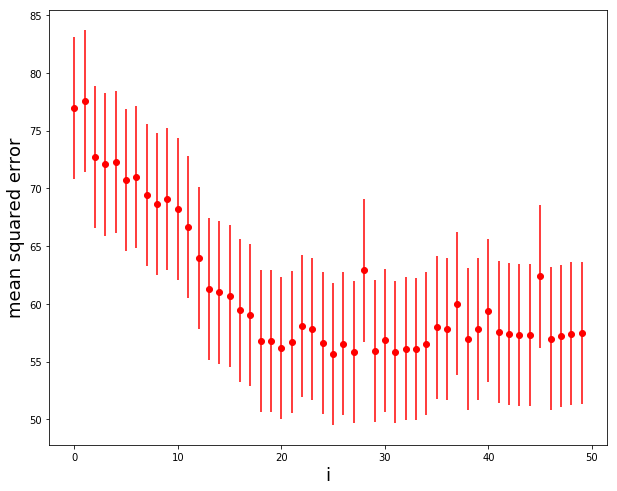

In [68]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111) 
# Set the axis lables
ax.set_xlabel('i', fontsize = 18)
ax.set_ylabel('mean squared error', fontsize = 18)
xaxis = np.array(range(0,50))
plt.errorbar(xaxis, result_mse,np.std(result_mse), color= 'red', label='A',linestyle='None', marker='o')